# Question 1
Write a query to find the region producing the 5th highest revenue from a table called region in the last 28 days

In [ ]:
SELECT region_name, total_revenue
FROM (
    SELECT region_name, 
           SUM(revenue) AS total_revenue,
           ROW_NUMBER() OVER (ORDER BY SUM(revenue) DESC) AS rank
    FROM region
    WHERE date >= CURDATE() - INTERVAL 28 DAY
    GROUP BY region_name
) AS ranked_regions
WHERE rank = 5

# Question 2
### Challenge
Given two strings, write a program to determine the longest common subsequence between them. Each string can have a maximum length of 50 characters. Note, this subsequence need not be contiguous.

### Input
Your program should read lines of text from standard input. ignore empty lines. each non-empty line will contain semicolon-separated strings. you can assume that there is only one unique subsequence per line.

### Output
For each line of input, print to standard output the longest common subsequence. ensure that the are no trailing spaces on each line you print.

In [3]:
import sys

In [5]:
def longest_common_subsequence(s1, s2):
    # Create a 2D array to store the lengths of longest common subsequence
    dp = [[0] * (len(s2) + 1) for _ in range(len(s1) + 1)]
    
    # Fill dp array
    for i in range(1, len(s1) + 1):
        for j in range(1, len(s2) + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    
    # Backtrack to find the LCS
    i, j = len(s1), len(s2)
    lcs = []
    while i > 0 and j > 0:
        if s1[i - 1] == s2[j - 1]:
            lcs.append(s1[i - 1])
            i -= 1
            j -= 1
        elif dp[i - 1][j] > dp[i][j - 1]:
            i -= 1
        else:
            j -= 1
    
    return ''.join(reversed(lcs))

In [25]:
# Input
line = "ABC;ACD"

# Output
s1, s2 = line.split(';')
result = longest_common_subsequence(s1, s2)
print(result)

AC


## Explaination

In [27]:
dp = [[0] * (len(s2) + 1) for _ in range(len(s1) + 1)]
printa(dp)

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


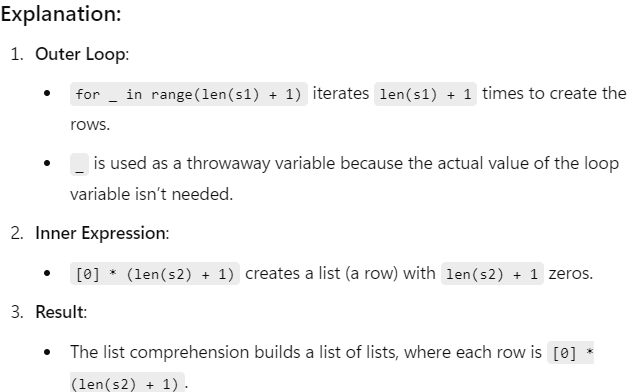

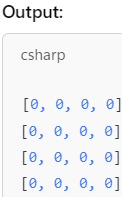

In [ ]:
# Fill dp array
for i in range(1, len(s1) + 1):
    for j in range(1, len(s2) + 1):
        if s1[i - 1] == s2[j - 1]:
            dp[i][j] = dp[i - 1][j - 1] + 1
        else:
            dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

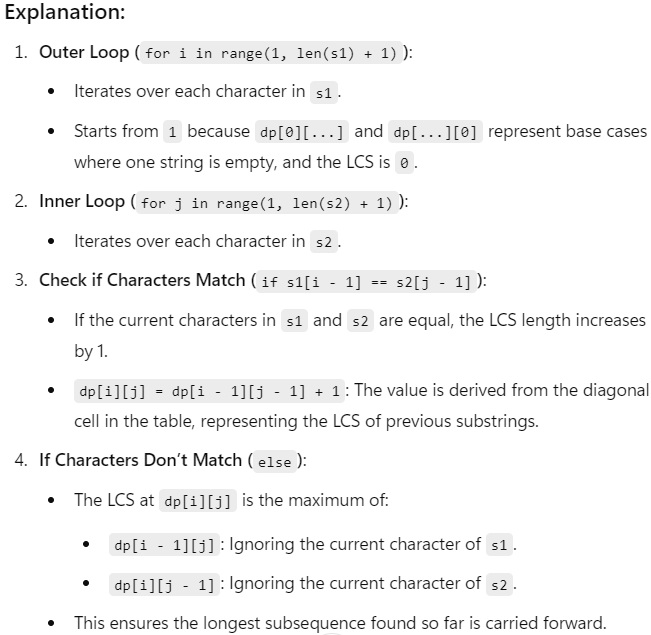

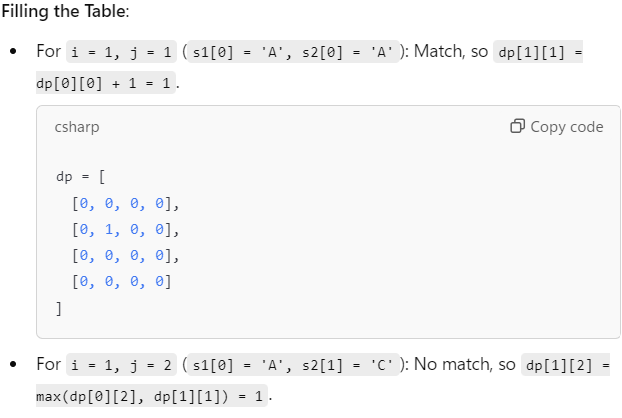
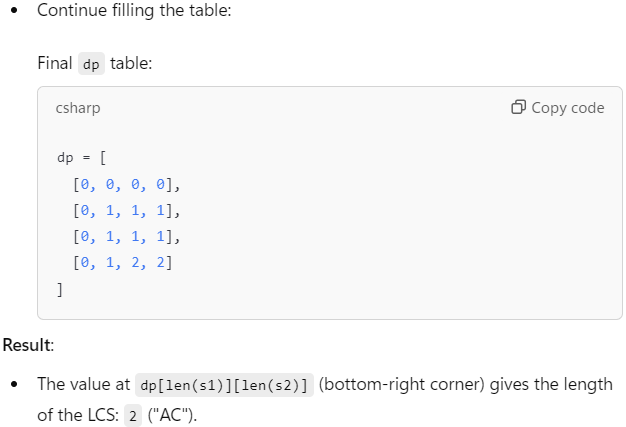

In [ ]:
# Backtrack to find the LCS
i, j = len(s1), len(s2)
lcs = []
while i > 0 and j > 0:
    if s1[i - 1] == s2[j - 1]:
        lcs.append(s1[i - 1])
        i -= 1
        j -= 1
    elif dp[i - 1][j] > dp[i][j - 1]:
        i -= 1
    else:
        j -= 1

return ''.join(reversed(lcs))

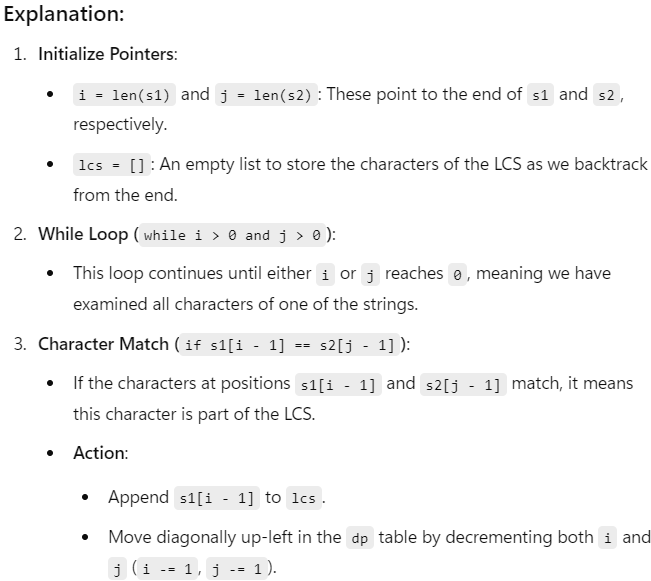
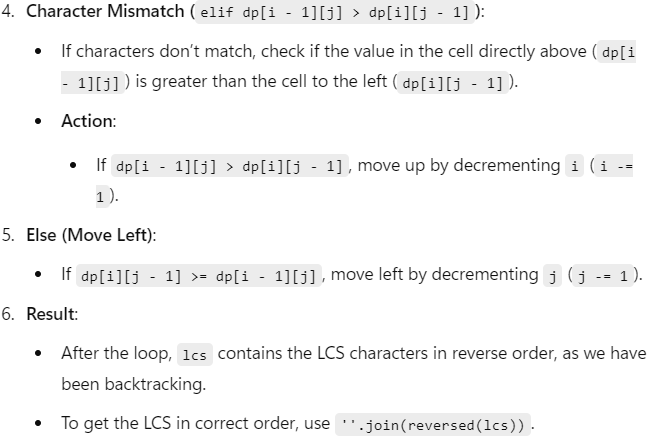

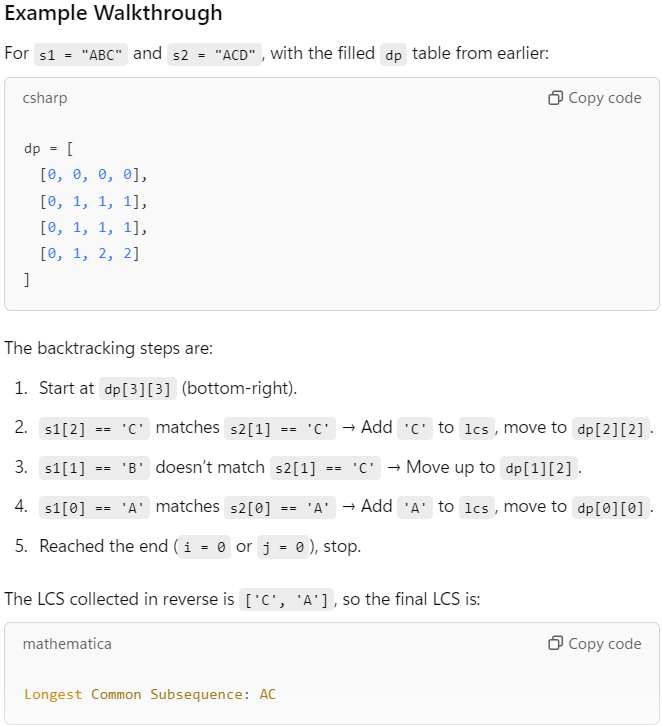